<ipython-input-2-7b8d36c33c70>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ss = imageio.imread(img_path)


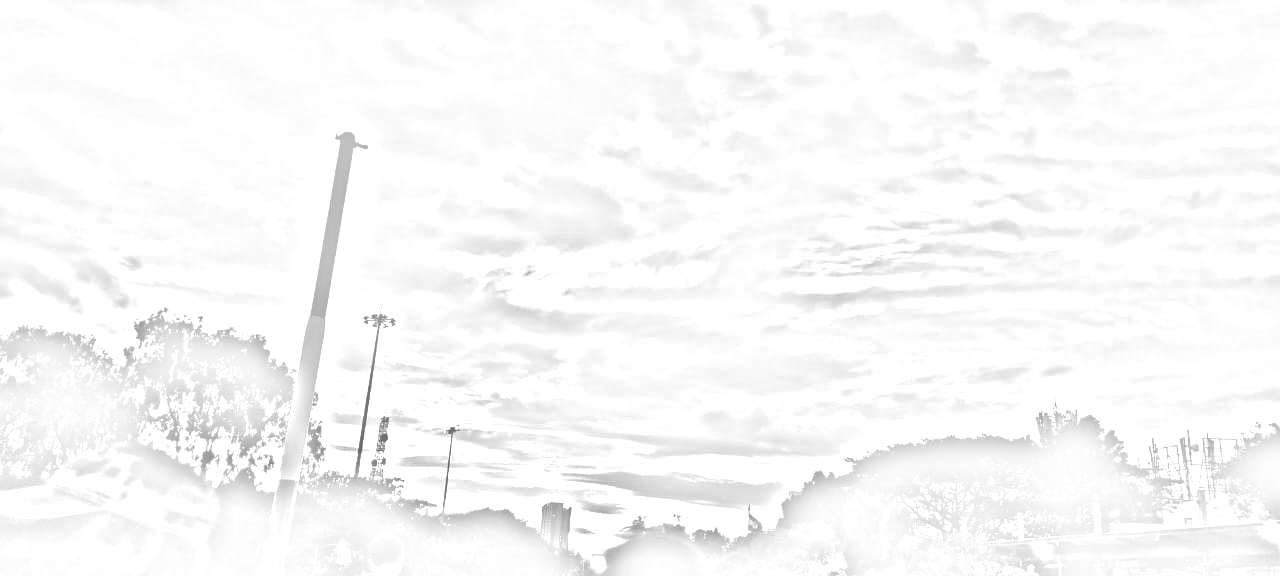

In [2]:
import numpy as np
import imageio
import scipy.ndimage
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

# Input image file path
img_path = "pic.jpg"

# Function to convert an RGB image to grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Function to create a sketch from the grayscale image
def create_sketch(img):
    inverted_img = 255 - img
    blur = scipy.ndimage.gaussian_filter(inverted_img, sigma=13)
    sketch = dodge(blur, img)
    return sketch

# Function to dodge two images
def dodge(front, back):
    result = front * 255 / (255 - back)
    result[result > 255] = 255
    result[back == 255] = 255
    return result.astype('uint8')

# Load the image using ImageIO
ss = imageio.imread(img_path)
gray = rgb2gray(ss)

# Create the sketch
sketch = create_sketch(gray)

# Display the sketch using cv2_imshow in Colab
cv2_imshow(sketch)

# Save the sketch as "sketch.png"
imageio.imsave('sketch.png', sketch)
